In [115]:
import numpy as np 
import torch
import torch.nn as nn 
import torch.nn.functional as F
from torchinfo import summary
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import torch.optim as optim
from sklearn.metrics import accuracy_score

In [116]:
class RBF(nn.Module):

    def __init__(self, n_f , n_n): # gets number of features and neurons
        super(RBF, self).__init__()
        self.centre = nn.Parameter(torch.rand(n_n, n_f))
        self.sigma = nn.Parameter(torch.ones (n_n, 1))
        
    def forward(self,x):
        r = torch.cdist(x, self.centre)
        return torch.exp(-r ** 2 / (2 * self.sigma ** 2))
    

In [117]:
data= torch.randn(1,2)
rbf = RBF(n_f=2, n_n = 3)
output =rbf(data)

print(output)

tensor([[0.7088, 0.9207, 0.5352],
        [0.7088, 0.9207, 0.5352],
        [0.7088, 0.9207, 0.5352]], grad_fn=<ExpBackward0>)


In [118]:
class RBFNetwork(nn.Module):
    def __init__(self):
        super(RBFNetwork, self).__init__()
        self.rbf = RBF(n_f=2, n_n=3)
        self.fc = nn.Linear(3, 2)  # Fully connected layer after RBF
    def forward(self, x):
        rbf_out = self.rbf(x)
        return self.fc(rbf_out)

In [119]:
class RBFNetworkwithBN(nn.Module):
    def __init__(self):
        super(RBFNetworkwithBN, self).__init__()
        self.rbf = RBF(n_f=2, n_n=3)
        self.bn = nn.BatchNorm1d(3) # batch normalization
        self.fc = nn.Linear(3, 2)  # fully connected layer after RBF

    def forward(self, x):
        rbf_out = self.rbf(x)
        bn_out = self.bn(rbf_out)
        return self.fc(bn_out)

In [120]:
model_with_bn = RBFNetworkwithBN()  # Model with Batch Normalization
model_without_bn = RBFNetwork()

# Loss function 
l = nn.MSELoss()


In [121]:
# Optimizers to test
optimizers = {
    'SGD': torch.optim.SGD(model_without_bn.parameters(), lr=0.01),
    'Adam': torch.optim.Adam(model_without_bn.parameters(), lr=0.01),
    'RMSprop': torch.optim.RMSprop(model_without_bn.parameters(), lr=0.01)
}


# Training loop
epochs = 100
for opt_name, optimizer in optimizers.items():
    print(f"\nTraining with {opt_name} optimizer:")
    for epoch in range(epochs):
        model_without_bn.train()  # Set the model to training mode

        # Forward pass: Get the model output
        model_output = model_without_bn(data)

        # For reconstruction loss (if you're reconstructing input):
        # Ensure data and model_output have the same shape
        loss = l(model_output, data)

        # Backward pass and optimization
        optimizer.zero_grad()  # Clear previous gradients
        loss.backward()        # Backpropagate the error
        optimizer.step()       # Update the model parameters

    print(f"Final loss using {opt_name}: {loss.item():.4f}")

In [122]:

# Training loop
epochs = 100
results_without_bn = []
results_with_bn = []

optimizer_with_bn = torch.optim.Adam(model_with_bn.parameters(), lr=0.01)
optimizer_without_bn = torch.optim.Adam(model_without_bn.parameters(), lr=0.01)

# without Batch Normalization
for epoch in range(epochs):

    model_without_bn.train()
    output = model_without_bn(data)
    loss = l(output, data)
    
    optimizer_without_bn.zero_grad()
    loss.backward()
    optimizer_without_bn.step()
    
    results_without_bn.append(loss.item())

    



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([1, 2])) that is different to the input size (torch.Size([3, 2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [123]:
# with Batch Normalization
for epoch in range(epochs):
    
    model_with_bn.train()
    
    output_bn = model_with_bn(data)
    loss_bn = l(output_bn, data)

    optimizer_with_bn.zero_grad()
    loss_bn.backward()
    optimizer_with_bn.step()
    
    results_with_bn.append(loss_bn.item())

Final loss without Batch Normalization: 0.0000
Final loss with Batch Normalization: 0.0002


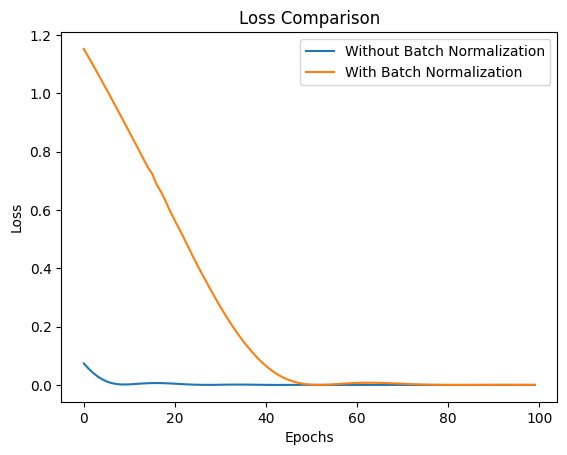

In [124]:
# Compare the final results
print("Final loss without Batch Normalization: {:.4f}".format(results_without_bn[-1]))
print("Final loss with Batch Normalization: {:.4f}".format(results_with_bn[-1]))


plt.plot(results_without_bn, label='Without Batch Normalization')
plt.plot(results_with_bn, label='With Batch Normalization')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Comparison')
plt.show()

TAMRIN- Q2

In [125]:
nPerClust_SA = 100
C1 = [1,1]
C2 = [5,1]
C3 = [3,-2]
C4 = [4,4]
blur = 1
radius = np.array([0.8,0.8,0.8,0.8])

C1Data = np.array([C1[0] + radius[0] * np.random.randn(nPerClust_SA) * blur , C1[1] + radius[0] * np.random.randn(nPerClust_SA) * blur ])
C2Data = np.array([C2[0] + radius[1] * np.random.randn(nPerClust_SA) * blur , C2[1] + radius[1] * np.random.randn(nPerClust_SA) * blur ])
C3Data = np.array([C3[0] + radius[2] * np.random.randn(nPerClust_SA) * blur , C3[1] + radius[2] * np.random.randn(nPerClust_SA) * blur ])
C4Data = np.array([C4[0] + radius[3] * np.random.randn(nPerClust_SA) * blur , C4[1] + radius[3] * np.random.randn(nPerClust_SA) * blur ])

np_data = np.hstack((C1Data,C2Data,C3Data,C4Data)).T
Label1 = np.zeros((C1Data.shape[1],1))
Label2 = Label1 + 1
Label3 = Label1 + 2
Label4 = Label1 + 3
np_labels = np.vstack((Label1, Label2, Label3, Label4)).flatten()

In [126]:
scaler = StandardScaler()
np_data = scaler.fit_transform(np_data)
# Convert to tensors
X_tensor = torch.tensor(np_data, dtype=torch.float32)
y_tensor = torch.tensor(np_labels, dtype=torch.long)

In [127]:
class RBF_layer(nn.Module):
    def __init__(self, n_f, n_n): 
        super(RBF_layer, self).__init__()
        self.centre = nn.Parameter(torch.rand(n_n, n_f)) 
        self.sigma = nn.Parameter(torch.ones(n_n))      

    def forward(self, x):
        r = torch.cdist(x, self.centre) 
        return torch.exp(-r ** 2 / (2 * self.sigma**2)) 


In [128]:
class RBFNetwork2(nn.Module):
    def __init__(self, n_features, n_neurons, n_classes):
        super(RBFNetwork2, self).__init__()
        self.rbf = RBF_layer(n_f=n_features, n_n=n_neurons)
        self.fc = nn.Linear(n_neurons, n_classes) 
        self.softmax = nn.Softmax(dim=1)  # softmax for multiclass

    def forward(self, x):
        rbf_out = self.rbf(x)
        out = self.fc(rbf_out)
        return self.softmax(out) 

In [129]:
def train_rbf_network(X, y, n_neurons=10, n_features=2, n_classes=4, epochs=100, lr=0.01):
    # split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    model = RBFNetwork2(n_features=n_features, n_neurons=n_neurons, n_classes=n_classes)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = nn.CrossEntropyLoss() 

    # Training loop
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()

        outputs = model(X_train)
        loss = criterion(outputs, y_train)

        loss.backward()
        optimizer.step()


    # Test the model
    model.eval()
    with torch.no_grad():
        test_outputs = model(X_test)
        _, predicted = torch.max(test_outputs, 1)  
        accuracy = accuracy_score(y_test, predicted)
        print(f"Test Accuracy: {accuracy:.4f}")

    
        plt.figure(figsize=(8, 6))
        scatter = plt.scatter(X_test[:, 0], X_test[:, 1], c=predicted, cmap='viridis', marker='o')
        plt.legend(*scatter.legend_elements(), title="Classes")
        plt.title("Predicted Class Labels")
        plt.show()

    return model


Test Accuracy: 0.9500


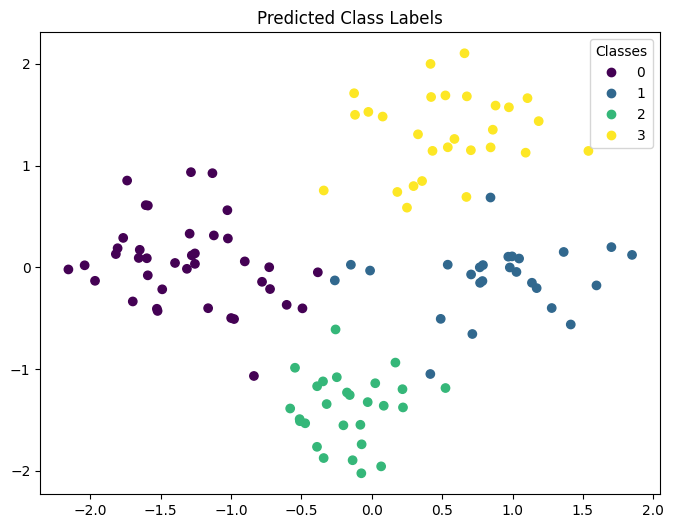

RBFNetwork2(
  (rbf): RBF_layer()
  (fc): Linear(in_features=10, out_features=4, bias=True)
  (softmax): Softmax(dim=1)
)

In [130]:
train_rbf_network(X_tensor, y_tensor, n_neurons=10, n_features=2, n_classes=4)